# Portfolio Review

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import random

jtplot.style(figsize=(15, 9))

In [2]:
tickers  = ['AMD', 'AMZN', 'BAC', 'META', 'AVGO', 'TER']
amounts  = [20, 10, 30, 10, 2, 5]
weights = [i / sum(amounts) for i in amounts]
returns = [f'{t}_returns' for t in tickers]

In [3]:
df = yf.download(tickers, dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
df.head()

[*********************100%***********************]  6 of 6 completed


Close                                                          \
                  AMD       AMZN       AVGO        BAC        META        TER   
Date                                                                            
2023-01-03  64.019997  85.820000  55.348000  32.075714  124.484192  85.381950   
2023-01-04  64.660004  85.139999  56.023998  32.678745  127.108803  86.862450   
2023-01-05  62.330002  83.120003  55.501999  32.611744  126.679688  86.564362   
2023-01-06  63.959999  86.080002  58.842999  32.937191  129.753372  90.658081   
2023-01-09  67.239998  87.360001  57.688999  32.439449  129.204498  92.615517   

                 High                                   ...       Open  \
                  AMD       AMZN       AVGO        BAC  ...       AVGO   
Date                                                    ...              
2023-01-03  66.879997  86.959999  56.757000  32.630891  ...  56.500000   
2023-01-04  65.790001  86.980003  56.816002  33.329545  ...  56.299000   
2023-01-05  64.349998  85.419998  55.984001  32.678748  ...  55.570999   
2023-01-06  64.300003  86.400002  59.099998  33.099917  ...  56.312000   
2023-01-09  69.320000  89.480003  60.167500  33.272309  ...  59.230000   

                                                Volume                      \
                  BAC        META        TER       AMD      AMZN      AVGO   
Date                                                                         
2023-01-03  31.807700  122.568131  88.283325  46851844  76706040  20173140   
2023-01-04  32.449020  127.118777  86.683597  47477139  68885123  17073590   
2023-01-05  32.468163  125.866356  86.286141  46159549  67930825  16278850   
2023-01-06  32.630888  128.705522  87.716960  70161340  83303361  35261010   
2023-01-09  33.262640  130.891035  92.342269  69741257  65266056  37738740   

                                         
                 BAC      META      TER  
Date                                     
2023-01-03  35221501  35528531  1033343  
2023-01-04  41998548  32397094  2025543  
2023-01-05  34177048  25447099   998686  
2023-01-06  34068731  27584498  1444467  
2023-01-09  43818820  26649145  1654473  

[5 rows x 30 columns]

In [4]:
portfolio = pd.DataFrame(index=df.index, columns=tickers, data=0)

for ticker, amount in zip(tickers, amounts):
    portfolio[ticker] = df['Close'][ticker] * amount
    portfolio[f'{ticker}_returns'] = np.log(portfolio[ticker].div(portfolio[ticker].shift(1)))

portfolio.dropna(axis=0, inplace=True)
portfolio.head()

,AMD,AMZN,BAC,META,AVGO,TER,AMD_returns,AMZN_returns,BAC_returns,META_returns,AVGO_returns,TER_returns
Date,,,,,,,,,,,,
2023-01-04,1293.200073,851.399994,980.362358,1271.088028,112.047997,434.312248,0.009947,-0.007955,0.018626,0.020865,0.012140,0.017191
2023-01-05,1246.600037,831.200027,978.352318,1266.796875,111.003998,432.821808,-0.036700,-0.024012,-0.002052,-0.003382,-0.009361,-0.003438
2023-01-06,1279.199982,860.800018,988.115730,1297.533722,117.685997,453.290405,0.025815,0.034992,0.009930,0.023974,0.058454,0.046207
2023-01-09,1344.799957,873.600006,973.183479,1292.044983,115.377998,463.077583,0.050010,0.014760,-0.015227,-0.004239,-0.019806,0.021362
2023-01-10,1361.000061,898.700027,979.788094,1327.172852,114.986000,470.877533,0.011974,0.028327,0.006764,0.026825,-0.003403,0.016703


In [5]:
rates = ['^GSPC', '^TNX']
rates_df = yf.download(rates, dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
rates_df = rates_df['Close']

rates_df['market_returns'] = np.log(rates_df['^GSPC'].div(rates_df['^GSPC'].shift(1)))
rates_df['risk_free_returns'] = np.log(rates_df['^TNX'].div(rates_df['^TNX'].shift(1)))

rates_df.dropna(inplace=True)
rates_df.head()

[*********************100%***********************]  2 of 2 completed


,^GSPC,^TNX,market_returns,risk_free_returns
Date,,,,
2023-01-04,3852.969971,3.709,0.007511,-0.022395
2023-01-05,3808.100098,3.720,-0.011714,0.002961
2023-01-06,3895.080078,3.569,0.022584,-0.041438
2023-01-09,3892.090088,3.517,-0.000768,-0.014677
2023-01-10,3919.250000,3.621,0.006954,0.029142


In [6]:
risk_free_rate = rates_df['risk_free_returns'].sum()
market_rate = rates_df['market_returns'].sum()
market_std = rates_df['market_returns'].std()
portfolio_std = portfolio[returns].sum(axis=1).std()
portfolio_returns = portfolio[returns].sum(axis=1).sum()

In [7]:
E_R_portfolio = risk_free_rate + (market_rate - risk_free_rate)*portfolio_std/market_std
E_R_portfolio

3.60118507844999

Text(0.08, 5.02, 'capital market line')

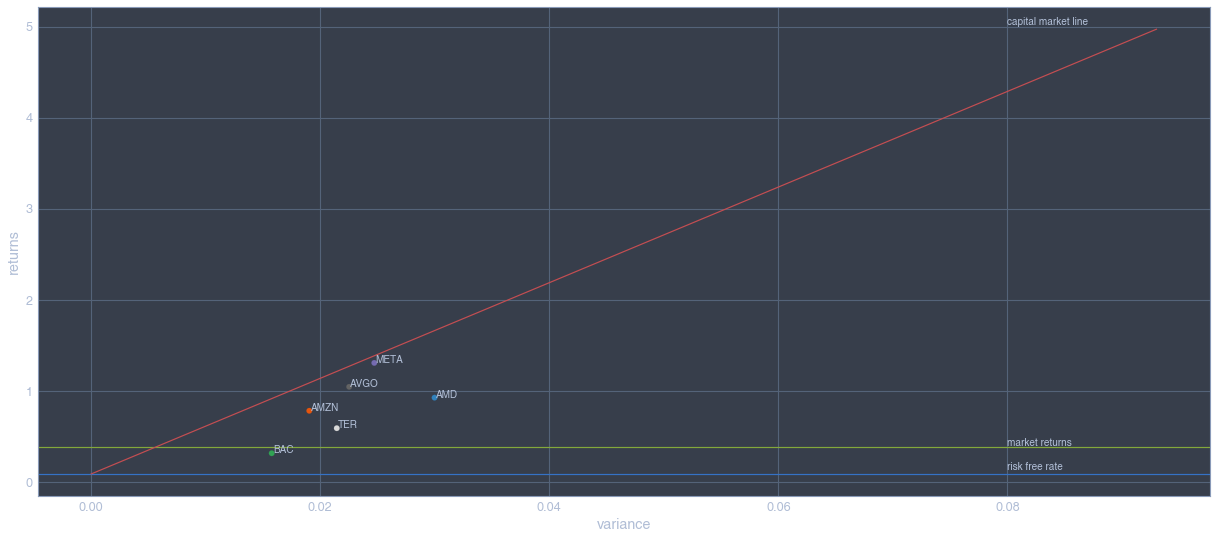

In [8]:
fig, ax = plt.subplots(1, figsize=(21, 9))

x = portfolio[returns].std().to_list()
y = portfolio[returns].sum().to_list()

ax.scatter(x, y, c=np.arange(6), cmap='tab20c')

ax.axhline(rates_df['risk_free_returns'].sum())
ax.axhline(rates_df['market_returns'].sum(), color='g')

ax.plot([0, portfolio_std], [risk_free_rate, portfolio_returns], c='r')


ax.set_xlabel('variance')
ax.set_ylabel('returns')

for i, ticker in enumerate(tickers):
    ax.annotate(ticker, (x[i], y[i]), xytext=(x[i]+0.0001, y[i]+0.0001))

ax.annotate('risk free rate', (0.08, 0.13))
ax.annotate('market returns', (0.08, 0.4))
ax.annotate('capital market line', (0.08, 5.02)) 